In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the datetime module
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/Kurs.xlsx - Kurs.csv')
data

,Nilai,Kurs Jual,Kurs Beli,Tanggal
0,1,"15.082,03","14.931,97",18/07/2023
1,1,"15.019,73","14.870,27",17/07/2023
2,1,"15.052,89","14.903,11",14/07/2023
3,1,"15.159,42","15.008,58",13/07/2023
4,1,"15.237,81","15.086,19",12/07/2023
...,...,...,...,...
347,1,"14.447,88","14.304,12",07/02/2022
348,1,"14.452,91","14.309,10",04/02/2022
349,1,"14.418,74","14.275,27",03/02/2022
350,1,"14.463,96","14.320,04",02/02/2022


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Nilai      352 non-null    int64 
 1   Kurs Jual  352 non-null    object
 2   Kurs Beli  352 non-null    object
 3   Tanggal    352 non-null    object
dtypes: int64(1), object(3)
memory usage: 11.1+ KB


In [ ]:
data = data.filter(['Tanggal', 'Kurs Jual'])
data.head()

,Tanggal,Kurs Jual
0,18/07/2023,"15.082,03"
1,17/07/2023,"15.019,73"
2,14/07/2023,"15.052,89"
3,13/07/2023,"15.159,42"
4,12/07/2023,"15.237,81"


In [ ]:
data = data.set_index(['Tanggal'])
data.head(5)

,Kurs Jual
Tanggal,
18/07/2023,"15.082,03"
17/07/2023,"15.019,73"
14/07/2023,"15.052,89"
13/07/2023,"15.159,42"
12/07/2023,"15.237,81"


In [ ]:
data.index = pd.to_datetime(data.index, format= '%d/%m/%Y')
data

,Kurs Jual
Tanggal,
2023-07-18,"15.082,03"
2023-07-17,"15.019,73"
2023-07-14,"15.052,89"
2023-07-13,"15.159,42"
2023-07-12,"15.237,81"
...,...
2022-02-07,"14.447,88"
2022-02-04,"14.452,91"
2022-02-03,"14.418,74"


In [ ]:
data.sort_values(by='Tanggal', ascending=True, inplace=True)
data

,Kurs Jual
Tanggal,
2022-01-31,"14.452,91"
2022-02-02,"14.463,96"
2022-02-03,"14.418,74"
2022-02-04,"14.452,91"
2022-02-07,"14.447,88"
...,...
2023-07-12,"15.237,81"
2023-07-13,"15.159,42"
2023-07-14,"15.052,89"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 352 entries, 2022-01-31 to 2023-07-18
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Kurs Jual  352 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


In [ ]:
data['Kurs Jual'] = data['Kurs Jual'].str.replace(',', '')
data

,Kurs Jual
Tanggal,
2022-01-31,14.45291
2022-02-02,14.46396
2022-02-03,14.41874
2022-02-04,14.45291
2022-02-07,14.44788
...,...
2023-07-12,15.23781
2023-07-13,15.15942
2023-07-14,15.05289


In [ ]:
data = data.astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 352 entries, 2022-01-31 to 2023-07-18
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Kurs Jual  352 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


In [ ]:
data.describe()

,Kurs Jual
count,352.000000
mean,15.046969
std,0.416811
min,14.349390
25%,14.772742
50%,15.023245
75%,15.322482
max,15.820710


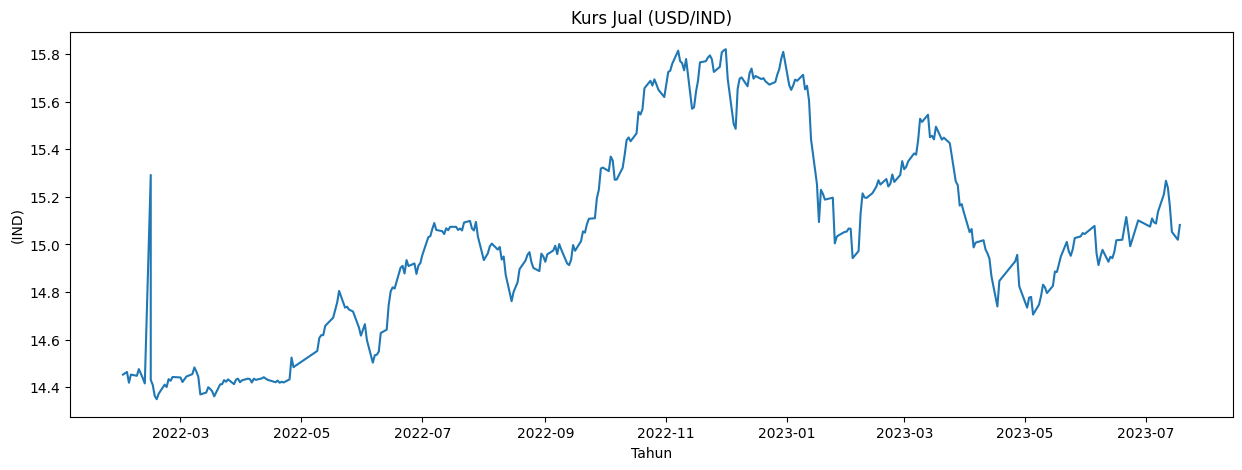

In [ ]:
plt.figure(figsize=(15, 5))
plt.title("Kurs Jual (USD/IND)")
plt.plot(data)
plt.xlabel('Tahun')
plt.ylabel('(IND)')
plt.show();

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

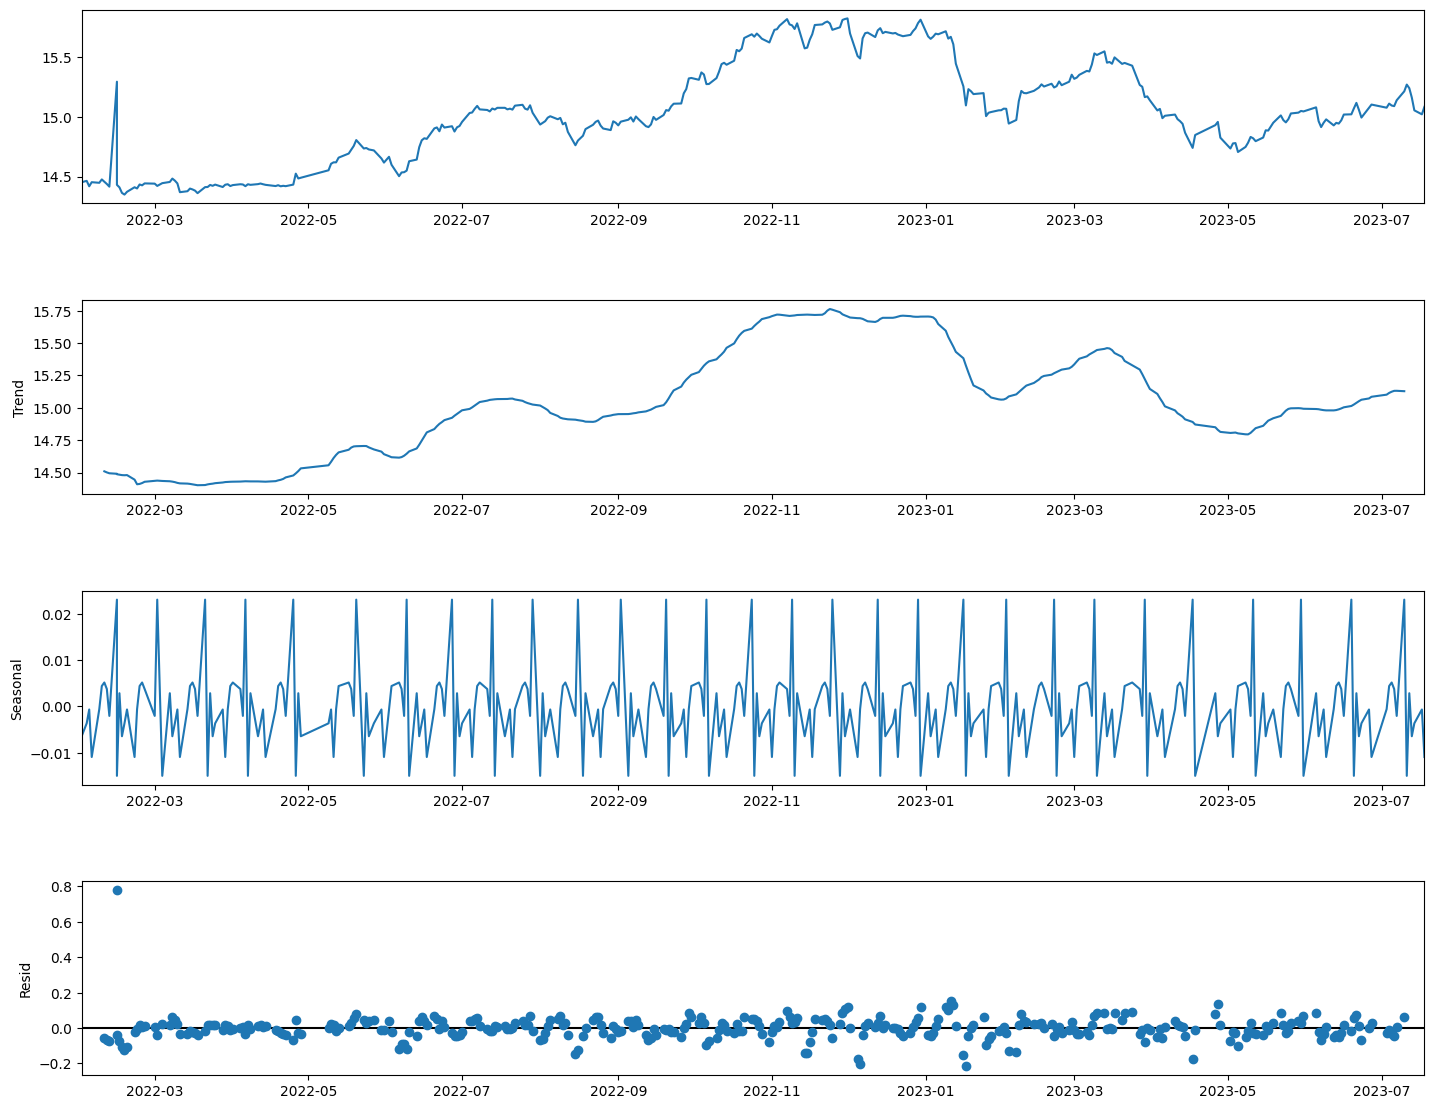

In [ ]:
result = seasonal_decompose(data, model='additive', period=12)
fig = result.plot()
fig.set_size_inches(16, 12)

In [ ]:
def plot_graph(timeseries):
    # window size 12 denotes 12 months, giving rolling mean at yearly level
    rolling_mean = data["Kurs Jual"].rolling(window=12).mean()
    rolling_std = data["Kurs Jual"].rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(15,7))
    plt.plot(data["Kurs Jual"], color='#379BDB', label='Original')
    plt.plot(rolling_mean, color='#D22A0D', label='Rolling Mean')
    plt.plot(rolling_std, color='#142039', label='Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show();

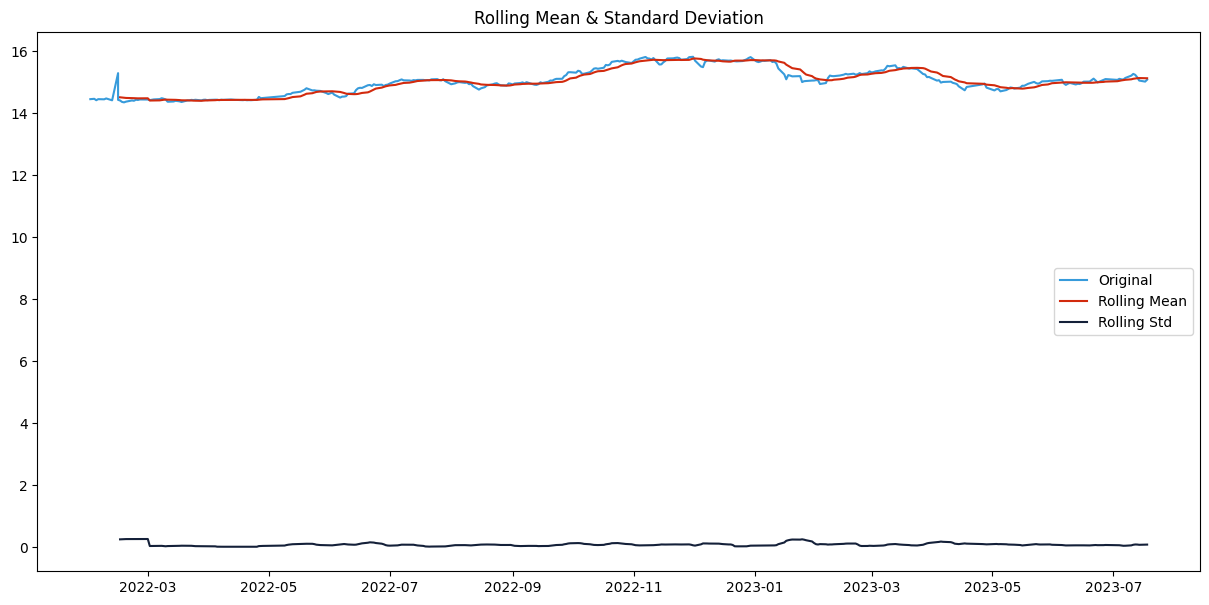

In [ ]:
plot_graph(data)

In [ ]:
!pip install statsmodels

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
adf_test(data['Kurs Jual'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.735503
p-value                          0.412919
#Lags Used                       7.000000
Number of Observations Used    344.000000
Critical Value (1%)             -3.449503
Critical Value (5%)             -2.869979
Critical Value (10%)            -2.571266
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [ ]:
kpss_test(data)

Results of KPSS Test:
Test Statistic            1.399114
p-value                   0.010000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


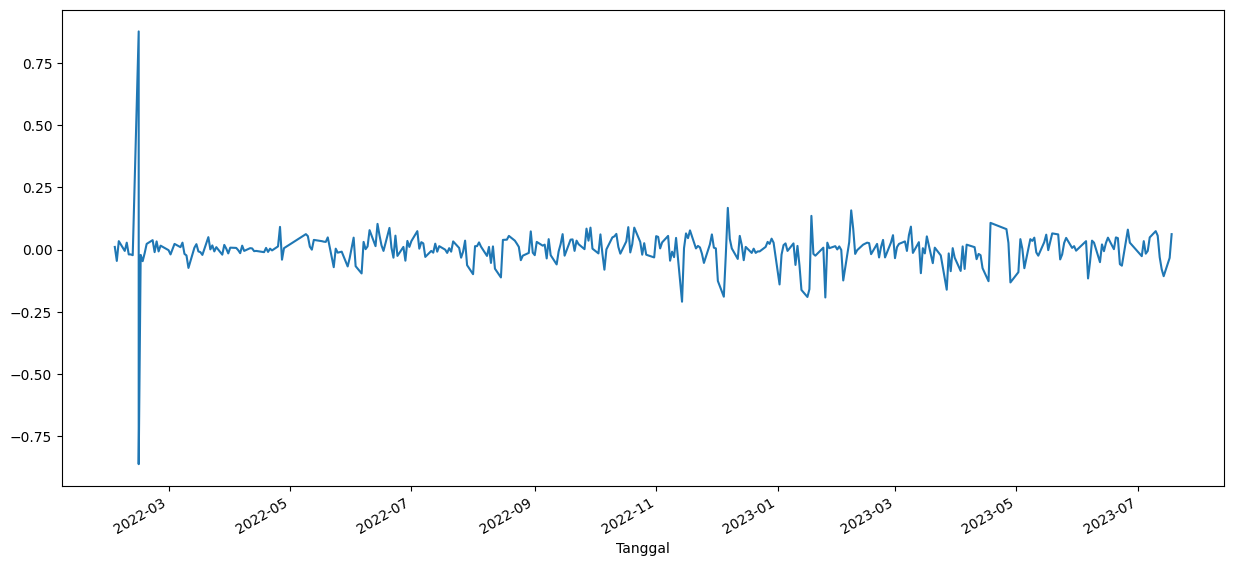

In [ ]:
plt.figure(figsize=(15, 7))
data['difference1'] = data['Kurs Jual'] - data['Kurs Jual'].shift(1)
data['difference1'].plot();

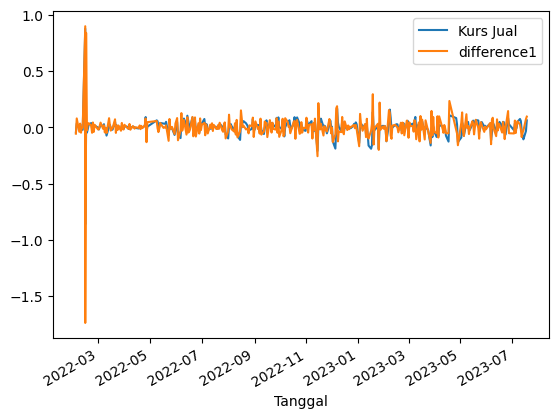

In [ ]:
df_train_diff = data.diff().dropna()
df_train_diff.plot();

In [ ]:
adf_test(data['difference1'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -7.077699e+00
p-value                        4.754538e-10
#Lags Used                     6.000000e+00
Number of Observations Used    3.440000e+02
Critical Value (1%)           -3.449503e+00
Critical Value (5%)           -2.869979e+00
Critical Value (10%)          -2.571266e+00
dtype: float64


In [ ]:
kpss_test(data['difference1'].dropna())

Results of KPSS Test:
Test Statistic            0.15285
p-value                   0.10000
Lags Used                12.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [ ]:
data_train = data['Kurs Jual'][:int(len(data['Kurs Jual'])*0.75)] #split dataset into 75/25%
data_test = data['Kurs Jual'][int(len(data['Kurs Jual'])*0.75):]

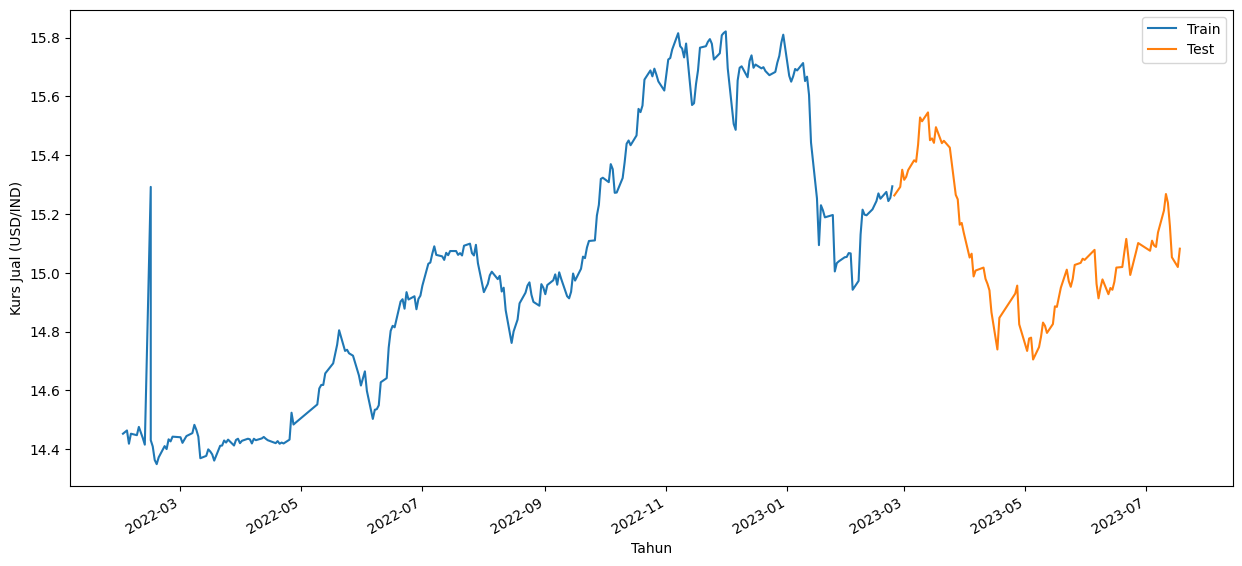

In [ ]:
# Visualize split
fig, ax = plt.subplots(figsize=(15, 7))

data_train.plot(ax=ax)
data_test.plot(ax=ax)

plt.xlabel('Tahun')
plt.ylabel("Kurs Jual (USD/IND)")
plt.legend(['Train','Test']);

In [ ]:
pip install pmdarima

In [ ]:
import pmdarima as pm
# use autoarima to obtain values of p,d, and q
autoARIMA_model = pm.auto_arima(data_train, # data
                                start_p=1, # initial guess for p
                                start_q=1, # initial guess for q
                                max_p=4, # max value for p to test
                                max_q=4, # max value for q to test
                                test='adf', # use adftest to find optimal 'd'
                                m=12, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                                d=1, # non-seasonal difference order
                                seasonal=False, # is the time series non-seasonal
                                trace=True, # print results whilst training
                                D=0,
                                error_action='ignore',  # ignore orders that don't work
                                suppress_warning=True,
                                stepwise=True) # apply intelligent order search

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-536.359, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-511.762, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-533.806, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-538.074, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-513.435, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-536.329, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-534.074, Time=0.52 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-539.249, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-537.474, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-537.453, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-535.222, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-535.257, Time=0.15 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.070 seconds


In [ ]:
print(autoARIMA_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 271.625
Date:                Wed, 26 Jul 2023   AIC                           -539.249
Time:                        09:18:55   BIC                           -532.105
Sample:                             0   HQIC                          -536.378
                                - 264                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3436      0.016    -21.322      0.000      -0.375      -0.312
sigma2         0.0074      0.000     50.695      0.000       0.007       0.008
Ljung-Box (L1) (Q):                   0.01   Jarque-

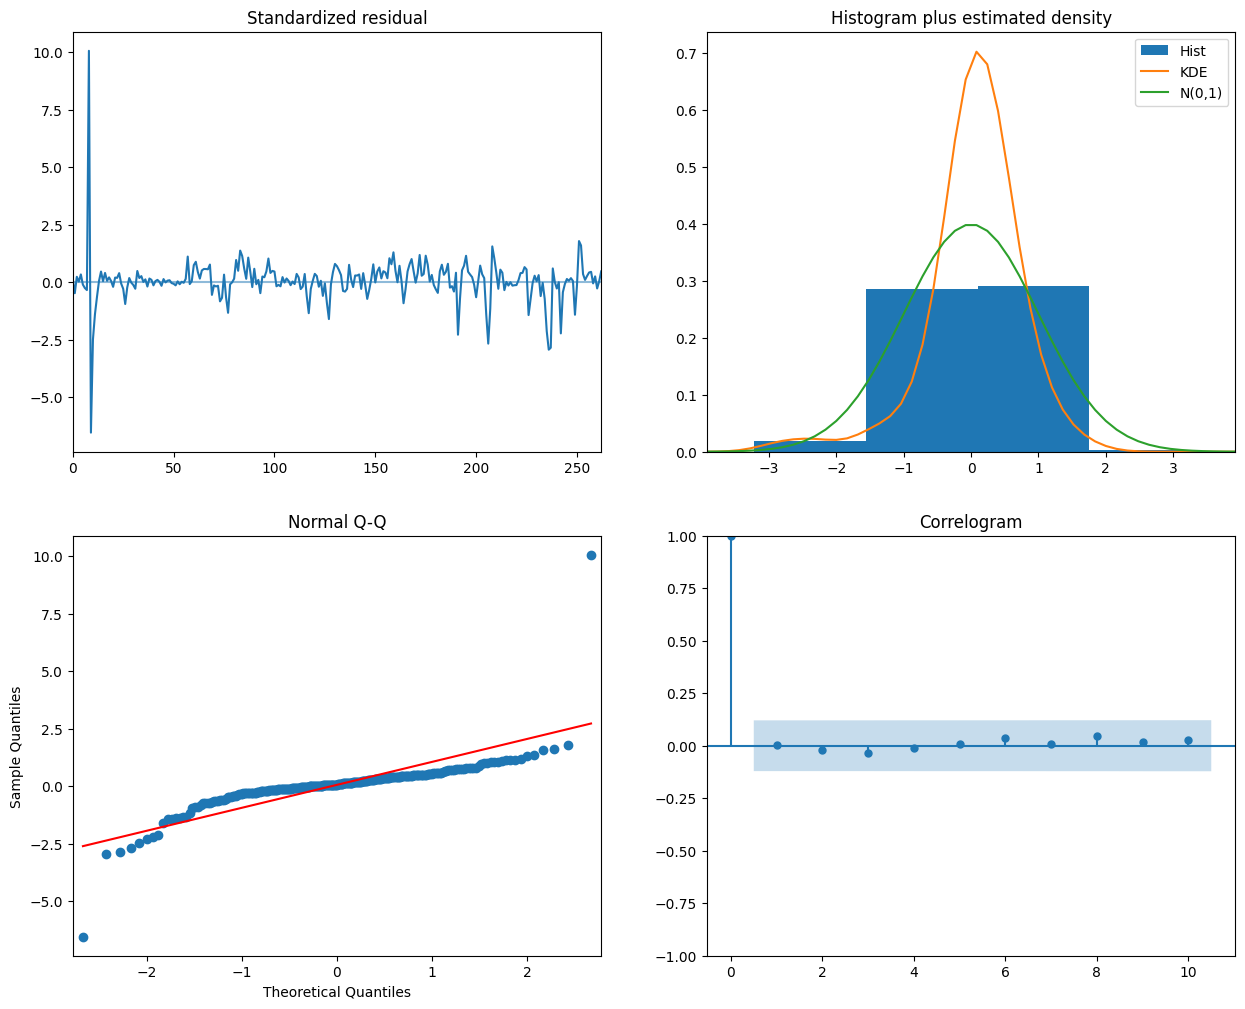

In [ ]:
autoARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [ ]:
def forecasts(model, actual):
    fc, conf = model.predict(n_periods = len(actual), return_conf_int = True)
    fc_series = pd.Series(fc, index = data_test.index)
    lower_bound = pd.Series(conf[:,0], index = actual.index)
    upper_bound = pd.Series(conf[:,1], index = actual.index)
    # plot
    plt.figure(figsize=(15, 7))
    plt.plot(data['Kurs Jual'])
    plt.plot(actual, color='orange', label='actual')
    plt.plot(fc_series, color='green', label='Forecasts')
    plt.fill_between(lower_bound.index, lower_bound, upper_bound, color='k',alpha=.15)
    plt.legend(loc = 'upper left')
    plt.xlabel('Year')
    plt.ylabel('IND')
    plt.title("Forecast of Kurs Jual (USD/IND)")
    plt.show();

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


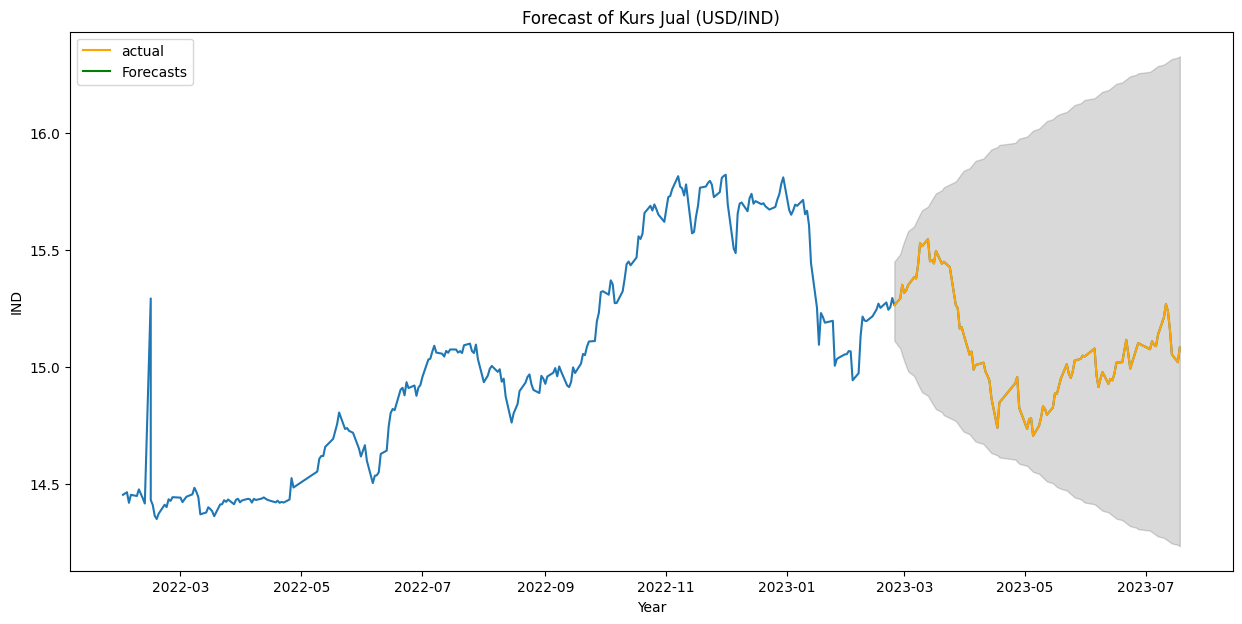

In [ ]:
forecasts(autoARIMA_model, data_test)

In [ ]:
data_test.head()

Tanggal
2023-02-24    15.26293
2023-02-27    15.29208
2023-02-28    15.35037
2023-03-01    15.31620
2023-03-02    15.32625
Name: Kurs Jual, dtype: float64

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_squared_error

# Accuracy metrics
def forecast_accuracy(forecast, actual):
    MSE  = mean_squared_error(actual, forecast) # Mean squared error
    corr = np.corrcoef(forecast, actual)[0,1] # Correlation
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)  # MinMax

    df_performance = pd.Series([corr, MSE, minmax],
                             index=['Correlation',
                                    'Mean Squared Error',
                                    'MinMax'])
    return df_performance

In [ ]:
fc, conf = autoARIMA_model.predict(n_periods = len(data_test), return_conf_int = True)
forecastArima_series = pd.Series(fc)
forecastArima_series.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


264    15.280282
265    15.280282
266    15.280282
267    15.280282
268    15.280282
dtype: float64

In [ ]:
forecast_accuracy(forecastArima_series, data_test)

Correlation           7.577800e-16
Mean Squared Error    8.465712e-02
MinMax                1.671146e-02
dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(data_test, forecastArima_series)
mape = mean_absolute_percentage_error(data_test, forecastArima_series)
rmse = np.sqrt(mean_squared_error(data_test, forecastArima_series))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 0.25568779227799937
mape - auto: 0.017061046967761336
rmse - auto: 0.2909589619740947


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


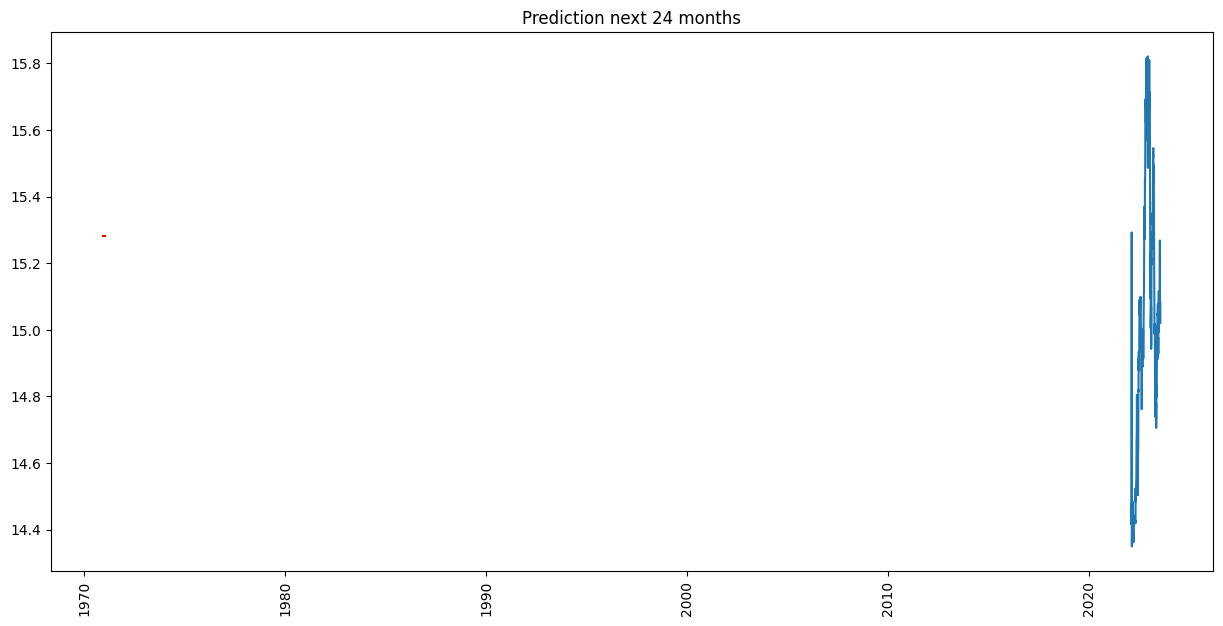

In [ ]:
future_forecast = autoARIMA_model.predict(n_periods = len(data_test) + 24)

plt.figure(figsize=(15,7))
plt.plot(data['Kurs Jual'])
plt.plot(future_forecast[len(data_test):], color='red')
plt.xticks(rotation='vertical')
plt.title('Prediction next 24 months')
plt.show();

In [ ]:
future_forecast = autoARIMA_model.predict(n_periods = len(data_test) + 24)
future_forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


264    15.280282
265    15.280282
266    15.280282
267    15.280282
268    15.280282
         ...    
371    15.280282
372    15.280282
373    15.280282
374    15.280282
375    15.280282
Length: 112, dtype: float64